In [1]:
#import packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os

%matplotlib inline

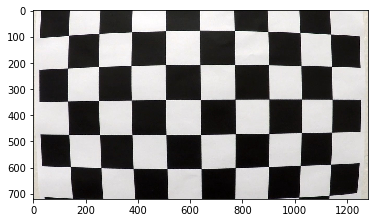

In [2]:
# Test the path by reading and showing an image
image_test = mpimg.imread('camera_cal/calibration1.jpg')
plt.imshow(image_test)

True

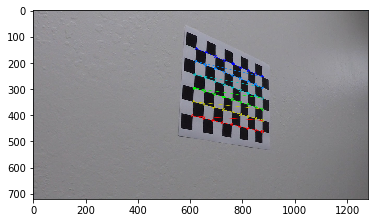

In [5]:
### This cell is to calibrate and undistort the camera via images in \camera_cal ###
import glob
# Define path to create output images in
path = r'C:\Users\HalleyandWoody\Documents\Python\self-driving\P2-Advanced-Lane-Lines\output_images'

# List all images to iterate through
image_names = os.listdir("camera_cal/")

# Create a function to calibrate our camera given an image, object point and image points
def calibrate_camera(img, objpoints, imgpoints):

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return ret, mtx, dist, rvecs, tvecs

## In order to calibrate our camera, we need to find object pts and image pts
images = glob.glob('camera_cal\calibration*.jpg')

#objpoints are the same for all calibration images
objpoints = []
imgpoints = []
# The following two lines of code were taken from the video in lesson 5
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

#loop through all images and find all imgpoints and objpoints
for imgpath in images:
    img = mpimg.imread(imgpath) # read in image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to grayscale
    
    # Find corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        #Visualize corners
        img = cv2.drawChessboardCorners(img, (9,6),corners, ret)
        plt.imshow(img)
    
#calibrate our camera given the objpoints and imgpoints just calculated
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

#Undistort "calibration2.jpg" image in camera_cal folder and output the result to output_images folder
img = cv2.imread('camera_cal/calibration2.jpg')

undist = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite(os.path.join(path , 'Undistorted Calibration Image.jpg'), undist) # copies image into output_images directory


    

['straight_lines1.jpg', 'straight_lines2.jpg', 'test1.jpg', 'test2.jpg', 'test3.jpg', 'test4.jpg', 'test5.jpg', 'test6.jpg']


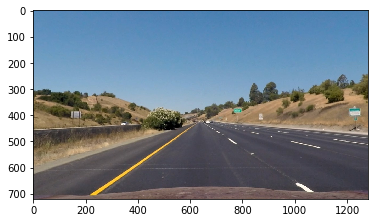

In [6]:
## Apply distortion correction to raw images (test images)

# Get test image names
image_names = os.listdir("test_images/")                                                   # Create list of images to read
print(image_names)

#initialize list for undistorted test images
undistorted_images = []

# Loop through all test images, undistort them, then add to the list above
for image in image_names:
    
    image_read = mpimg.imread('test_images/' + image)
    undist = cv2.undistort(image_read, mtx, dist, None, mtx)
    undistorted_images.append(undist)

# Test the undistortion on a test image and create an output image in output_images folder
image_write = cv2.cvtColor(undistorted_images[0], cv2.COLOR_RGB2BGR)
cv2.imwrite(os.path.join(path , 'Undistorted Test Image.jpg'), image_write) # copies image into output_images directory
plt.imshow(undistorted_images[0])